# Author: Kumar R

This is page contains the code for CNN architechture and model I trained. It also includes the prediction of offline image

In [1]:
# Import libraries 
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
# Import libraries from keras
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

In [3]:
# Authentication for google drive
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [8]:
# Load the dataset from the drive
train_data = '/content/drive/MyDrive/Colab Notebooks/Driver_Drowsiness/dataset_new/train'
test_data = '/content/drive/MyDrive/Colab Notebooks/Driver_Drowsiness/dataset_new/test'

In [9]:
# Data Augumentation for train data
train_augumentor = ImageDataGenerator(rescale=1./255,
                                rotation_range = 20,
                                shear_range = 30,
                                zoom_range = 0.2,
                                width_shift_range=0.2)

# Data Augumentation for test data
test_augumentor = ImageDataGenerator(rescale=1./255)

In [10]:
# Create a train and test image dataset for model to train and test respetively
train = train_augumentor.flow_from_directory(train_data,
                                             target_size = (150,150), # Image size
                                             batch_size = 20, # 20 images per batch
                                             color_mode = 'grayscale', # Converting color to grayscale
                                             class_mode = 'binary') # Since I have only 2 classes

test = test_augumentor.flow_from_directory(test_data,
                                           batch_size = 20,
                                           target_size = (150,150),
                                           color_mode = 'grayscale',
                                           class_mode = 'binary')

Found 1234 images belonging to 2 classes.
Found 217 images belonging to 2 classes.


# CNN Model

In [12]:
# Build a model using CNN and ANN network

# Initialize the model
model  = tf.keras.models.Sequential()

# Add input layer to the model
model.add(tf.keras.layers.Conv2D(32, (3,3),activation='relu',input_shape = (150,150,1)))
model.add(tf.keras.layers.MaxPooling2D(2,2))

# Add hidden layers
model.add(tf.keras.layers.Conv2D(32,(3,3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(2,2))

model.add(tf.keras.layers.Conv2D(32,(3,3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(2,2))

# Flaten
model.add(tf.keras.layers.Flatten())

# Dense layers
model.add(tf.keras.layers.Dense(units=124, activation='relu'))

# Output layer
model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [13]:
# Model compiler 
model.compile(optimizer='Adam', loss = 'binary_crossentropy', metrics=['accuracy'])

In [14]:
# Model training
hist = model.fit_generator(train, 
                           validation_data=test,
                           epochs=100,
                           steps_per_epoch= 62, # number_of_images = batch_size X steps_per_epoch
                           validation_steps= 11, 
                           verbose= True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/100
62/62 [==============================] - 334s 5s/step - loss: 0.5546 - accuracy: 0.7010 - val_loss: 0.2580 - val_accuracy: 0.9078
Epoch 2/100
62/62 [==============================] - 11s 183ms/step - loss: 0.3481 - accuracy: 0.8533 - val_loss: 0.1981 - val_accuracy: 0.9263
Epoch 3/100
62/62 [==============================] - 11s 186ms/step - loss: 0.3323 - accuracy: 0.8712 - val_loss: 0.2022 - val_accuracy: 0.9493
Epoch 4/100
62/62 [==============================] - 11s 182ms/step - loss: 0.2406 - accuracy: 0.9109 - val_loss: 0.1588 - val_accuracy: 0.9447
Epoch 5/100
62/62 [==============================] - 11s 183ms/step - loss: 0.2600 - accuracy: 0.9011 - val_loss: 0.1975 - val_accuracy: 0.9493
Epoch 6/100
62/62 [==============================] - 11s 186ms/step - loss: 0.2129 - accuracy: 0.9125 - val_loss: 0.1474 - val_accuracy: 0.9355
Epoch 7/100
62/62 [==============================] - 11s 181ms/step - loss: 0.1981 - accuracy: 0.9165 - val_loss: 0.1879 - val_accuracy: 0

Text(0.5, 1.0, 'Model Evaluation with Adam 150X150')

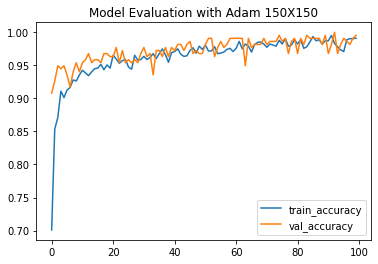

In [15]:
# Visualise the model
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.legend(['train_accuracy','val_accuracy'])
plt.title('Model Evaluation with Adam 150X150')
plt.show()

In the above training, we can see that at 93rd epoch I recieved 100% testing accuracy.

Now, I will use Early Stopping method to stop trainig the model I received the required output from the model

# Early Stope Method

In [16]:
# Early stopping

class My_Earlystop(tf.keras.callbacks.Callback):
  def __init__(self, cl):
    super(My_Earlystop,self).__init__()
    self.cl = cl

  def on_epoch_end(self, epoch, logs=None):
    train_score = logs['accuracy']
    test_score = logs['val_accuracy']

    if (test_score>train_score and test_score >=self.cl) or test_score == 1 :
      self.model.stop_training =  True

In [17]:
# Calling early_stoping method
early_stoping = My_Earlystop(cl = 1.0) # Since I got 100% accuracy above, I have test accuracy as 100%

# Train model with Early_stopping callbacks
final_hist = model.fit_generator(train, validation_data=test, epochs=100, steps_per_epoch= 62, validation_steps= 11, verbose= True, callbacks = [early_stoping])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  import sys


Epoch 1/100
62/62 [==============================] - 11s 184ms/step - loss: 0.0375 - accuracy: 0.9887 - val_loss: 0.0164 - val_accuracy: 0.9954
Epoch 2/100
62/62 [==============================] - 11s 183ms/step - loss: 0.0244 - accuracy: 0.9911 - val_loss: 0.0121 - val_accuracy: 0.9954
Epoch 3/100
62/62 [==============================] - 11s 182ms/step - loss: 0.0201 - accuracy: 0.9895 - val_loss: 0.0465 - val_accuracy: 0.9862
Epoch 4/100
62/62 [==============================] - 11s 180ms/step - loss: 0.0232 - accuracy: 0.9903 - val_loss: 0.0191 - val_accuracy: 0.9862
Epoch 5/100
62/62 [==============================] - 11s 183ms/step - loss: 0.0154 - accuracy: 0.9951 - val_loss: 0.0255 - val_accuracy: 0.9862
Epoch 6/100
62/62 [==============================] - 11s 183ms/step - loss: 0.0238 - accuracy: 0.9919 - val_loss: 0.0466 - val_accuracy: 0.9862
Epoch 7/100
62/62 [==============================] - 11s 183ms/step - loss: 0.0256 - accuracy: 0.9903 - val_loss: 0.0716 - val_accuracy:

Text(0.5, 1.0, 'Final Model Performance')

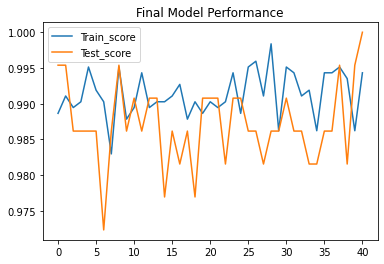

In [19]:
# Performace visualisation
plt.plot(final_hist.history['accuracy'])
plt.plot(final_hist.history['val_accuracy'])
plt.legend(['Train_score','Test_score'])
plt.title('Final Model Performance')
plt.show()

Model gave 100% accuracy at 41st epoch and it stopped training further so that I can save the best model for the deployment

# Model Save

In [20]:
# Save the model for tensorflow 2.0
model.save('Drowsiness_CNN_Model_tf2.tf')

INFO:tensorflow:Assets written to: Drowsiness_CNN_Model_tf2.tf/assets


In [21]:
# Save the trained model for tensorflow 1.0
model.save('Drowsiness_CNN_Model_tf1.h5')

# Prediction Stage

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

C:\Users\Kumar\anaconda3\lib\site-packages\requests\__init__.py:89: RequestsDependencyWarning: urllib3 (1.25.9) or chardet (4.0.0) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "


In [2]:
from keras.models import load_model
from keras.preprocessing import image

In [3]:
tf.__version__

'2.4.1'

In [4]:
#Load the trained model
model = load_model('Drowsiness_CNN_Model_tf1.h5')

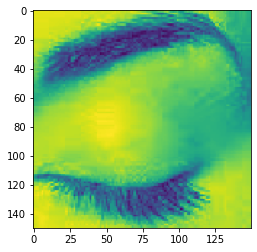

In [5]:
# Load image
url_closed = 'test.jpg'
test_image = image.load_img(url_closed, target_size=(150,150),color_mode='grayscale')

plt.imshow(test_image)
plt.show()


In [6]:
import warnings
warnings.filterwarnings('ignore')
# Convert the image to array
test_image = image.img_to_array(test_image)
# expand the dimentions of an image (4D)
test_image = np.expand_dims(test_image, axis=0)
# Predict the output
pred = model.predict(test_image)

# if condition based on the probability value
if pred[0][0]==1:
  print('Eye Open')
elif pred[0][0]==0:
  print('Eye closed')

Eye closed


In [ ]:
# if Pred == 0, Closed
# if pred == 1, Open